In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Convolution

Let the convolution sum of a linear, time invariant (LTI) system $y[n]$ with some impulse respoance $h[n]$ and some input $x[n]$ be defined as 
$$ y[n] = \sum_{k=-\infty}^\infty x[k] h[n]. $$

Now let
$$ h[n] = \begin{cases}
        1, \text{ for } 0 \leq n \leq 2, \\
        0, \text{ otherwise}
        \end{cases}
$$

and
$$ x[n] = \begin{cases}
        0.5, \text{ for } n = 0,\\
        2, \text{ for } n = 1,\\
        0, \text{ otherwise}.
        \end{cases}
$$

## Define your signal and impulse response

In [8]:
neg_vals = 1
samples = np.arange(-neg_vals, 10)

# We just assume that all values of x[n] and h[n] are zero outsde this range.

### Define impulse response and signal:
hs = np.zeros(10 + neg_vals)
hs[0 + neg_vals: 3 + neg_vals] = 1

xs = np.zeros(10 + neg_vals)
xs[neg_vals] = .5
xs[1 + neg_vals] = 2
###

assert (len(samples) == len(hs) == len(xs)), ValueError('You goofed up. All arrays must be of equal lenght.')


## Plot
Do check whether these match the figure 2.3 from the book.

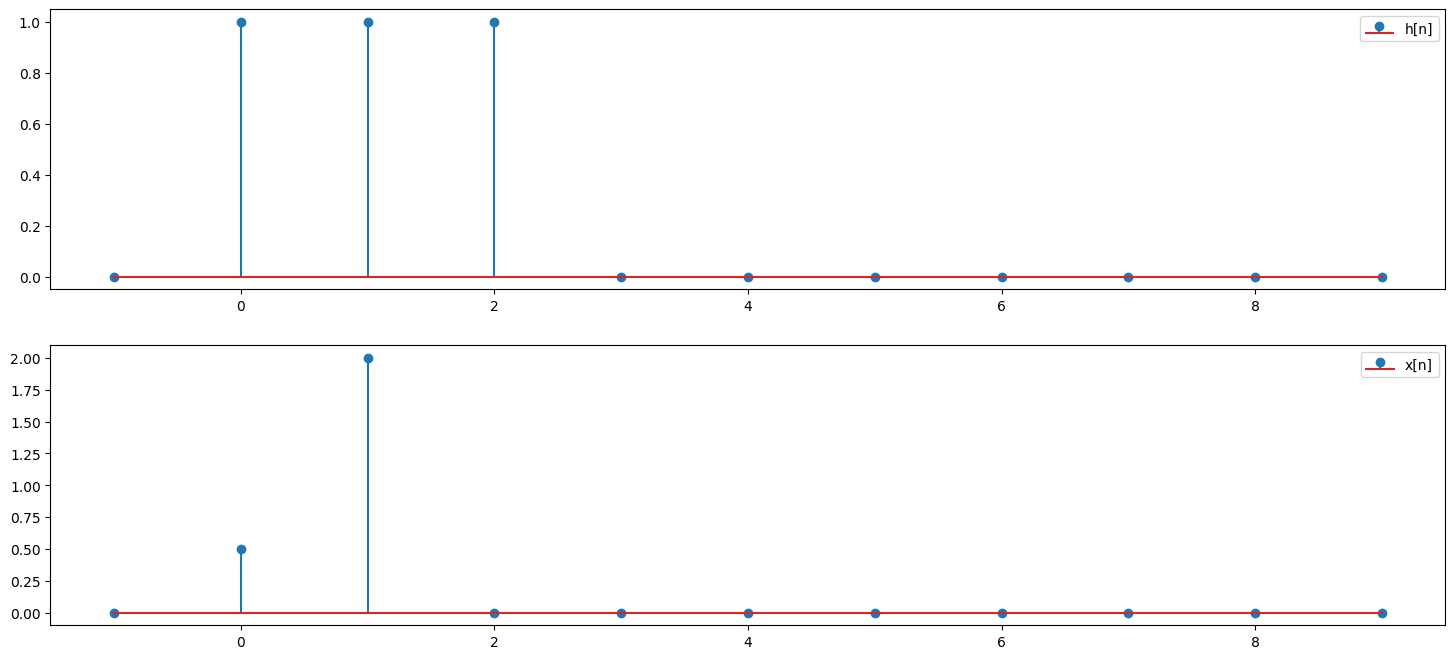

In [9]:
fig, axes = plt.subplots(nrows =2, figsize=(18, 8))
axes[0].stem(samples, hs, label='h[n]')
axes[1].stem(samples, xs, label='x[n]')

for ax in axes:
    ax.legend()

## Convolution sum

In [13]:
def conv_sum(signal, rsp):
    ### write some code that computes the convolution sum of input arrays signal, rsp (<- impulse response) and output some array y.
    y = np.zeros(rsp.shape)

    for n, _ in enumerate(rsp):
        for k, x in enumerate(signal):
            if n < k:
                break
            y[n] += x * rsp[n - k]
    ###
  #  assert (len(signal) == len(rsp) == len(y)), ValueError('all input and output arrays should have same length!')
    return y

#def conv_sum(signal, rsp):
   # return np.convolve(signal, rsp)


In [14]:
ys = conv_sum(xs, hs)

## Plot

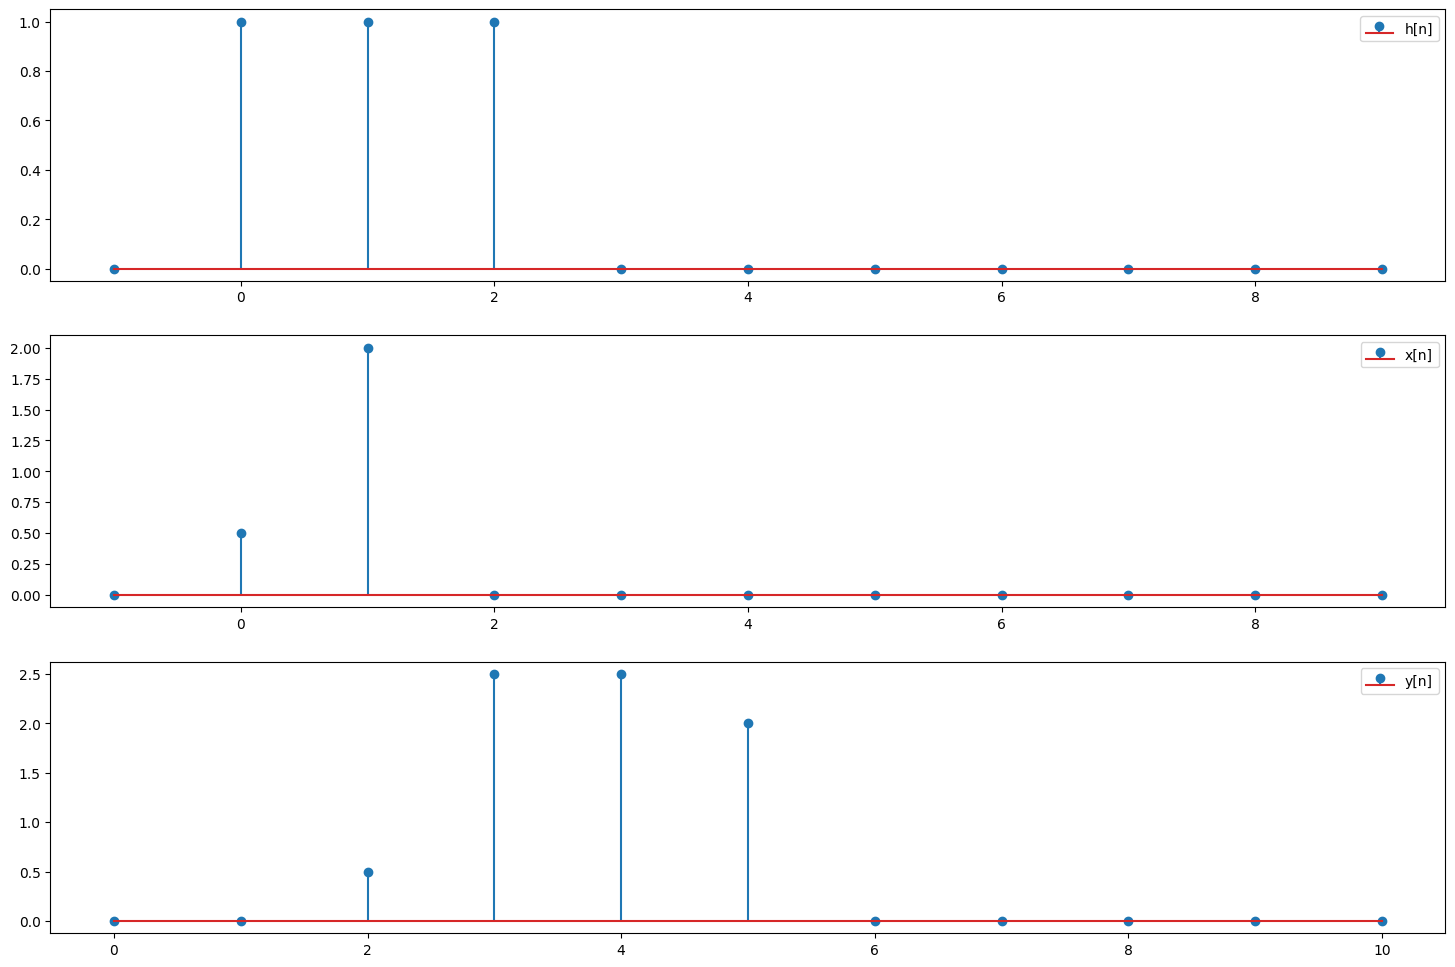

In [15]:
fig, axes = plt.subplots(nrows =3, figsize=(18, 12))
axes[0].stem(samples, hs, label='h[n]')
axes[1].stem(samples, xs, label='x[n]')
axes[2].stem(ys, label='y[n]')

for ax in axes:
    ax.legend()